In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')

/var/folders/rs/nvdnmtg96fjgmd1dcg_nhj_h0000gn/T/ipykernel_29989/4148410174.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')


In [172]:
# Parse csv into correct format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')

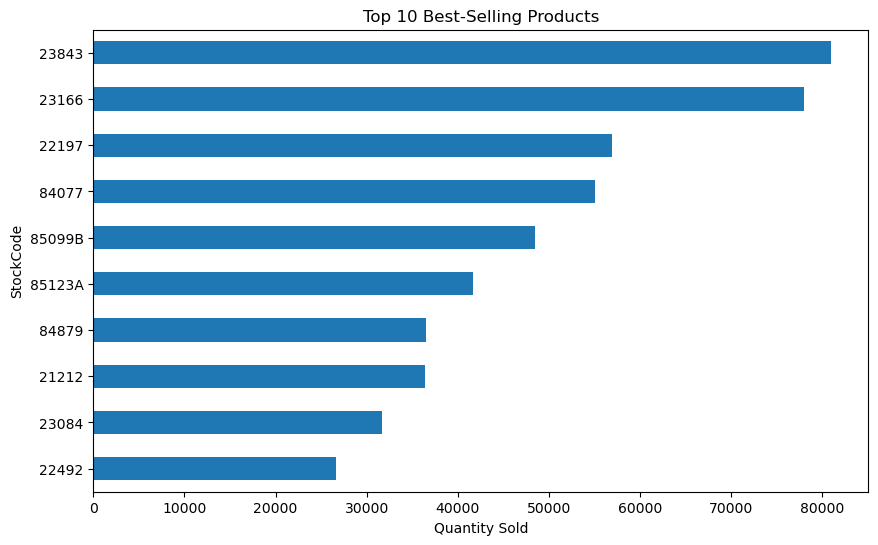

In [ ]:
# Finds products that sold the most and least, based on month and year

#Disrgards negative quantity values (returns) as we are looking for most sold
mmg = df[df['Quantity'] >= 0]

#Most
dec_2010 = mmg[(mmg['InvoiceDate'].dt.month == 12) & (mmg['InvoiceDate'].dt.year == 2010)]
grouped = mmg.groupby('StockCode')['Quantity'].sum()
sorted_grouped = grouped.sort_values(ascending=False)

max_num = grouped.max()
max_id = grouped.idxmax()
max_description = mmg[mmg['StockCode'] == max_id]['Description'].iloc[0]

#print('Top 5 most sold items:', sorted_grouped.head(5))
#print(max_num, max_id, ':', max_description)

#Least
min_num = grouped.min()
min_id = grouped.idxmin()
min_description = mmg[mmg['StockCode'] == min_id]['Description'].iloc[0]

#print('Top 5 least sold items:', sorted_grouped.tail(5))
#print(min_num, min_id, ':', min_description)

plt.figure(figsize=(10, 6))
sorted_grouped.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.show()

In [175]:
# Finds products with highest and lowest revenue (inclusive of returns)
revenue = df

#12/2010
dated_revenue = revenue[(revenue['InvoiceDate'].dt.month == 12) & (revenue['InvoiceDate'].dt.year == 2010)]
summed_revenue = dated_revenue.assign(Revenue = lambda dated_revenue: dated_revenue.Quantity * dated_revenue.UnitPrice)
grouped_revenue = summed_revenue.groupby('StockCode')['Revenue'].sum()
sorted_revenue = grouped_revenue.sort_values(ascending=False)
sorted_revenue = sorted_revenue.reset_index()


non_product = ['DOT', 'BANK CHARGES', 'D', 'AMAZONFEE', 'M', 'S']
sorted_revenue = sorted_revenue[~sorted_revenue.StockCode.isin(non_product)]


#sorted_revenue = sorted_revenue[(sorted_revenue['StockCode'] != 'DOT')]

#sorted_revenue.head(5)
print("Top 5 revenue:", sorted_revenue.head(5))
#sorts out non-product items
#sorted_revenue = sorted_revenue[(sorted_revenue['StockCode'] != 'D') & (sorted_revenue['StockCode'] != 'BANK CHARGES') & (sorted_revenue['StockCode'] != 'AMAZONFEE') & (sorted_revenue['StockCode'] != 'M') & (sorted_revenue['StockCode'] != 'S')]
print("Bottom 5 revenue:", sorted_revenue.tail(5))
# sorted_revenue.tail(5)


Top 5 revenue:   StockCode   Revenue
0     22423  26897.36
2    84029E   9291.73
3     22086   9205.15
4    85123A   9078.96
5     21479   8228.73
Bottom 5 revenue:      StockCode  Revenue
2812    84798A   -30.60
2813     35400   -49.70
2816     22588   -65.65
2817     22591   -71.40
2818     22580  -136.69


In [176]:
#Customers who bought the most (by dollar amount and quantity?)

#Dollar Amount
customer = df

#Dated customer list
customer = customer[(customer['InvoiceDate'].dt.month == 12) & (customer['InvoiceDate'].dt.year == 2010)]

customer = customer.assign(Revenue = lambda customer: customer.Quantity * customer.UnitPrice)
price_grouped_customer = customer.groupby('CustomerID')['Revenue'].sum()
price_sorted_customer = price_grouped_customer.sort_values(ascending=False)
price_sorted_customer.head(5)

#Quantity
#quant_grouped_customer = customer.groupby('CustomerID')['Quantity'].sum()
#quant_sorted_customer = quant_grouped_customer.sort_values(ascending=False)
#quant_sorted_customer.head(5)

CustomerID
18102.0    27834.61
15061.0    19950.66
16029.0    13112.52
14646.0     8591.88
16210.0     7000.64
Name: Revenue, dtype: float64

In [201]:
#Most popular day of the week
pop_day = df

#Dated
pop_day = pop_day[(pop_day['InvoiceDate'].dt.month == 12) & (pop_day['InvoiceDate'].dt.year == 2010)]

pop_day['DayOfWeek'] = pop_day['InvoiceDate'].dt.day_name()

most_pop = pop_day['DayOfWeek'].value_counts()

most_pop

#print(most_pop.idxmax(), ':', most_pop.head(1))

/var/folders/rs/nvdnmtg96fjgmd1dcg_nhj_h0000gn/T/ipykernel_29989/2738874852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_day['DayOfWeek'] = pop_day['InvoiceDate'].dt.day_name()


DayOfWeek
Friday       8075
Monday       7924
Thursday     7753
Wednesday    7395
Tuesday      6636
Sunday       4698
Name: count, dtype: int64

In [178]:
#how many hours the stores are open to better decide time of day
test = df
test['Hour'] = test['InvoiceDate'].dt.hour
test.Hour.unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6],
      dtype=int32)

In [ ]:
#Most popular times (and time of day?) for purchase throughout the week - by week
# - dollar amount?
# - quantity?
# - no. of invoices

#creates dataset col by week
pop_items = df
pop_items['Week'] = pop_items['InvoiceDate'].dt.to_period('W')
pop_items = pop_items[(pop_items['InvoiceDate'].dt.month == 12) & (pop_items['InvoiceDate'].dt.year == 2010) & (pop_items['Week'] == '2010-11-29/2010-12-05')]
#pop_items.head()

#creates dataset col by day of week
pop_items['DayOfWeek'] = pop_items['InvoiceDate'].dt.day_name()
#pop_items.head()

#creates datset col by hour of day
pop_items['Hour'] = pop_items['InvoiceDate'].dt.hour
#pop_items.head()

def timeOfDay(hour):
    if(6 <= hour < 12):
        return 'Morning'
    elif(12 <= hour < 17):
        return 'Afternoon'
    else:
        return 'Evening'

#creates dataset col by time of day
pop_items['TimeOfDay'] = pop_items['Hour'].apply(timeOfDay)
pop_items.head()

#creates dataset col by revenue
pop_items = pop_items.assign(Revenue = lambda pop_items: pop_items.Quantity * pop_items.UnitPrice)


#by dollar amount
pop_by_dollar = pop_items.groupby(['Hour', 'DayOfWeek'])['Revenue'].sum()
pop_by_dollar

pop_by_dollar = pop_by_dollar.reset_index()

max_rev_day = pop_by_dollar.loc[pop_by_dollar.groupby('DayOfWeek')['Revenue'].idxmax()]
max_rev_day

#by quantity bought
pop_by_quant = pop_items.groupby(['Hour', 'DayOfWeek'])['Quantity'].sum()
pop_by_quant = pop_by_quant.reset_index()
max_quant_day = pop_by_quant.loc[pop_by_quant.groupby('DayOfWeek')['Quantity'].idxmax()]
#max_quant_day

#by invoices
pop_by_inv = pop_items.groupby(['Hour', 'DayOfWeek'])['InvoiceNo'].nunique().reset_index()
max_inv_day = pop_by_inv.loc[pop_by_inv.groupby('DayOfWeek')['InvoiceNo'].idxmax()]
max_inv_day



/var/folders/rs/nvdnmtg96fjgmd1dcg_nhj_h0000gn/T/ipykernel_29989/1700869494.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_items['DayOfWeek'] = pop_items['InvoiceDate'].dt.day_name()
/var/folders/rs/nvdnmtg96fjgmd1dcg_nhj_h0000gn/T/ipykernel_29989/1700869494.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_items['Hour'] = pop_items['InvoiceDate'].dt.hour
/var/folders/rs/nvdnmtg96fjgmd1dcg_nhj_h0000gn/T/ipykernel_29989/1700869494.py:34: SettingWithCopyWarning: 
A value is trying to be set o

,Hour,DayOfWeek,InvoiceNo
26,15,Friday,35
15,12,Sunday,23
28,15,Thursday,22
17,12,Wednesday,23


In [ ]:
#Regions that made the most and least money

region = df

#dated
region = region[(region['InvoiceDate'].dt.month == 12) & (region['InvoiceDate'].dt.year == 2010)]

region = region.assign(Revenue = lambda region: region.Quantity * region.UnitPrice)
grouped_region = region.groupby('Country')['Revenue'].sum()
grouped_region = grouped_region.sort_values(ascending=False)
grouped_region
#grouped_region.head()
#grouped_region.tail()

Country
United Kingdom     676742.62
Germany             14562.84
France               9575.36
EIRE                 9029.95
Netherlands          8784.48
Japan                7705.07
Norway               3787.12
Sweden               2646.30
Portugal             2380.12
Spain                1843.73
Belgium              1809.91
Lithuania            1661.06
Cyprus               1590.82
Switzerland          1304.92
Denmark              1281.50
Australia            1005.10
Finland               892.80
Italy                 794.50
Iceland               711.79
Channel Islands       363.53
Austria               257.04
Poland                248.16
Bahrain               205.74
Israel               -227.44
Name: Revenue, dtype: float64

In [227]:
#Most and least returned items
returned = df
returned = returned[(region['InvoiceDate'].dt.month == 12) & (returned['InvoiceDate'].dt.year == 2010)]

returned = returned[returned['Quantity'] < 0]
grouped_returned = returned.groupby('StockCode')['Quantity'].sum()
sorted_returned = grouped_returned.sort_values(ascending=False)
print(sorted_returned)
'''
min_returned = sorted_returned.min()
min_return_id = grouped_returned.idxmin()
min_returned_description = returned[returned['StockCode'] == min_return_id]['Description'].iloc[0]

max_returned = sorted_returned.max()
max_return_id = grouped_returned.idxmax()
max_returned_description = returned[returned['StockCode'] == max_return_id]['Description'].iloc[0]
max_returned

sorted_returned
print(max_returned, max_return_id, ':', max_returned_description)
print(min_returned, min_return_id, ':', min_returned_description)
'''

StockCode
11001       -1
22908       -1
21427       -1
21424       -1
22656       -1
          ... 
20733     -300
21696     -320
85123A    -528
20956     -723
84347    -9369
Name: Quantity, Length: 498, dtype: int64


"\nmin_returned = sorted_returned.min()\nmin_return_id = grouped_returned.idxmin()\nmin_returned_description = returned[returned['StockCode'] == min_return_id]['Description'].iloc[0]\n\nmax_returned = sorted_returned.max()\nmax_return_id = grouped_returned.idxmax()\nmax_returned_description = returned[returned['StockCode'] == max_return_id]['Description'].iloc[0]\nmax_returned\n\nsorted_returned\nprint(max_returned, max_return_id, ':', max_returned_description)\nprint(min_returned, min_return_id, ':', min_returned_description)\n"